# **Final Projects 3 - Ensemble**

## **Perkenalan (Business and Data Understanding)**
<hr>
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

### Nama        : Nadiatus Salam
### No Peserta  : PYTN-KS19-014

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan


**Projects Overview**
<p style='text-align: justify;'>
    Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. </p>

<p style='text-align: justify;'>
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet dan, obesitas yang tidak sehat, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.</p>
    
<p style='text-align: justify;'>
Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.</p>
    
**Attribute Information:**

Dataset ini terdiri dari 13 atribut dengan 299 rows. Dalam kasus ini target dari hasil prediksi keselamatan pasien dari penyakit jantung adalah DEATH_EVENT atau kematian</p>

<ul style="text-transform: capitalize">
    <li>age: umur pasien</li>
    <li>anaemia: apakah ada pengurangan haemoglobin</li>
    <li>creatinine_phosphokinase: level enzim CPK dalam mcg/L</li>
    <li>diabetes: apakah pasien punya riwayat diabetes</li>
    <li>ejection_fraction: persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung</li>
    <li>high_blood_pressure: apakah pasien punya darah tinggi</li>
    <li>platelets: jumlah platelet di darah dalam kiloplatelets/mL</li>
    <li>serum_creatinine: level serum creatinine di darah dalam mg/dL</li>
    <li>serum_sodium: level serum sodium di darah dalam mEq/L</li>
    <li>sex: apakah pasien pria atau wanita</li>
    <li>smoking: apakah pasien merokok</li>
    <li>time: waktu dalam hari untuk follow-up</li>
    <li>DEATH_EVENT: apakah pasien sudah meninggal saat waktu follow-up</li>
</ul>

**Objektif**

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
<ul style="text-transform: capitalize">
    <li>Mampu memahami konsep Classification dengan Ensemble Model</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam Ensemble Model</li>
    <li>Mampu mengimplementasikan Ensemble Model untuk membuat prediksi</li>
</ul>


**Dataset Link** : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/

## **Import Libraries**
<hr>
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [209]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np
from scipy import stats


# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.patches as mpatches

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

# Data Exploration
import missingno as msno
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# For Modelling
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

## **Data Loading**
<hr>
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

### Import Dataset

In [150]:
# Membaca dataset dengan library pandas
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Menampilkan data teratas dan tail
df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Kesimpulan**

* creatinine_phosphokinase (CPK) merupakan enzim yang banyak ditemukan dalam otot rangka dan jantung. Tes CPK digunakan untuk mendiagnosis serangan jantung. `Nilai normal CPK berkisar antara 10-120 mcg/L`.

* ejection_fraction merupakan persentase darah yang meninggalkan jantung setiap kontraksi jantung. `ejection_fraction yang kurang dari 40% menandakan jantung tidak memompa darah dengan cukup baik atau dapat beresiko gagal jantung`.

* platelets adalah komponen darah berupa fragmen sitoplasma megakariosit tidak berinti yang memiliki ukuran lebih kecil dari sel darah putih dan merah. `Jumlah platelet normal sekitar 150.000 hingga 450.000 per microliter darah`.

* serum_creatinine adalah sampah hasil metabolisme otot yang mengalir dalam sirkulasi darah. Pada `laki-laki dewasa kadar normal serum_creatinine adalah 0,74 hingga 1,35 mg/dl`. Pada `perempuan dewasa sekitar 0,59 hingga 1,04 mg/dl`.

* serum_sodium adalah kadar natrium serum yang digunakan untuk menilai tonisitas serum yang sering terganggu akibat hiperglikemia.

### Number of Rows and Columns

In [151]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(299, 13)

In [152]:
# Cara lain untuk melihat baris dan kolom
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

Baris :  299
Kolom :  13


### Type of Data

In [153]:
# Melihat informasi datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Kesimpulan**

Dapat dilihat dari informasi di atas ada beberapa tipe kolom yang harus diubah yaitu :
- tipe data pada kolom `age` diubah menjadi integer
- `anaemia, diabetes, high_blood_pressure, smoking dan 'DEATH_EVENT'` diubah menjadi kategorik dengan nilai 'yes' atau 'no'
- `sex` diubah menjadi kategorik dengan nilai 'male' atau 'female'

###  Check Missing Values

In [154]:
# Memeriksa jumlah missing value 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Missing Value Inspection


In [155]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
age,0,0.0 %
anaemia,0,0.0 %
creatinine_phosphokinase,0,0.0 %
diabetes,0,0.0 %
ejection_fraction,0,0.0 %
high_blood_pressure,0,0.0 %
platelets,0,0.0 %
serum_creatinine,0,0.0 %
serum_sodium,0,0.0 %
sex,0,0.0 %


###  View Statistical Data

In [156]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Kesimpulan**

Dari statistik deskriptif tersebut diperoleh informasi hawa rata-rata penderita penyakit jantung memiliki kadar CPK sekitar 581,84. Hal tersebut menunjukkan bahwa ada kesalahan pada pengukuran sehingga ditemukan kadar CPK sebesar lebih dari 1000.

In [157]:
# Mengetahui jumlah kadar creatinine_phosphokinase lebih dari 1000
df.loc[df['creatinine_phosphokinase']>1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     float64
 1   anaemia                   36 non-null     int64  
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     int64  
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     int64  
 6   platelets                 36 non-null     float64
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     int64  
 10  smoking                   36 non-null     int64  
 11  time                      36 non-null     int64  
 12  DEATH_EVENT               36 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 3.9 KB


**Kesimpulan**

Ada sebanyak 36 pengamatan dari 299 pengamatan yang memiliki nilai CPK>1000. 36 pengamatan tersebut akan dihapus dari dataset.

## **Data Cleaning**
<hr>
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [158]:
# Menampilkan 5 data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Check the duplicated values

In [159]:
# Melihat duplikasi data
df.duplicated().sum()

0

**Kesimpulan**

Karena duplicated values=0 berarti tidak ada duplicated value pada dataset. Selanjutnya cek apakah terdapat missing values pada data.

### Missing Values

In [160]:
# Memeriksa jumlah missing value pada dataset 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Change Column Name

In [161]:
# Mengubah nama kolom DEATH_EVENT
df.rename(columns={'DEATH_EVENT':'patient_dead'}, inplace=True)

### Data Type Conversion

In [162]:
# Mengubah tipe data age menjadi integer
df.age= df.age.astype(int)

In [163]:
# Mengubah tipedata kolom kategorik
df['anaemia']= np.where(df['anaemia']==1, 'Yes', 'No')
df['diabetes']= np.where(df['diabetes']==1, 'Yes', 'No')
df['high_blood_pressure']= np.where(df['high_blood_pressure']==1, 'Yes', 'No')
df['smoking']= np.where(df['smoking']==1, 'Yes', 'No')
df['patient_dead']= np.where(df['patient_dead']==1, 'Yes', 'No')

df['sex'] = np.where(df['sex'] == 1, 'Male','Female')

### Change Unit Value

In [164]:
# Mengubah platelet dalam satuan mcl
df.platelets = (df. platelets/1000).astype(int) 

In [165]:
# Melihat perubahan tipe data pada setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    int32  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  patient_dead              299 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 28.2+ 

In [166]:
# Menghapus baris yang memiliki kadar creatinine_phosphokinase>1000
df.drop(df[df.creatinine_phosphokinase>1000].index, inplace=True)

In [167]:
# Melihat perubahan tipe data pada setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    object 
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    object 
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    object 
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    object 
 10  smoking                   263 non-null    object 
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 26.7+ 

**Kesimpulan**

Jadi data yang akan dianalis dan digunakan untuk membuat model sebanyak 263 observasi.

In [168]:
# Memeriksa nama kolom
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'patient_dead'],
      dtype='object')

In [169]:
heart_failure= df.copy()
heart_failure.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,61.262357,310.882129,38.167300,263.087452,1.394981,136.551331,127.060837
std,12.051559,247.586143,12.039794,95.974929,0.995056,4.288747,77.440719
min,40.000000,23.000000,14.000000,25.000000,0.600000,116.000000,4.000000
25%,51.500000,109.000000,30.000000,210.000000,0.900000,134.000000,69.500000
50%,60.000000,211.000000,38.000000,262.000000,1.100000,137.000000,110.000000
75%,70.000000,582.000000,45.000000,303.500000,1.450000,140.000000,200.500000
max,95.000000,981.000000,80.000000,850.000000,9.400000,148.000000,285.000000


In [170]:
# Melihat perubahan tipe data pada setiap kolom
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    object 
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    object 
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    object 
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    object 
 10  smoking                   263 non-null    object 
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(6)
memory usage: 26.7+ 

**Kesimpulan**

Dataset siap digunakan untuk melakukan analisis.

## **Explorasi Data (EDA)** 
<hr>
Bagian ini berisi explorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Mengetahui sebaran data numerik penderita gagal jantung

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'creatinine_phosphokinase'}>],
       [<AxesSubplot: title={'center': 'ejection_fraction'}>,
        <AxesSubplot: title={'center': 'platelets'}>],
       [<AxesSubplot: title={'center': 'serum_creatinine'}>,
        <AxesSubplot: title={'center': 'serum_sodium'}>]], dtype=object)

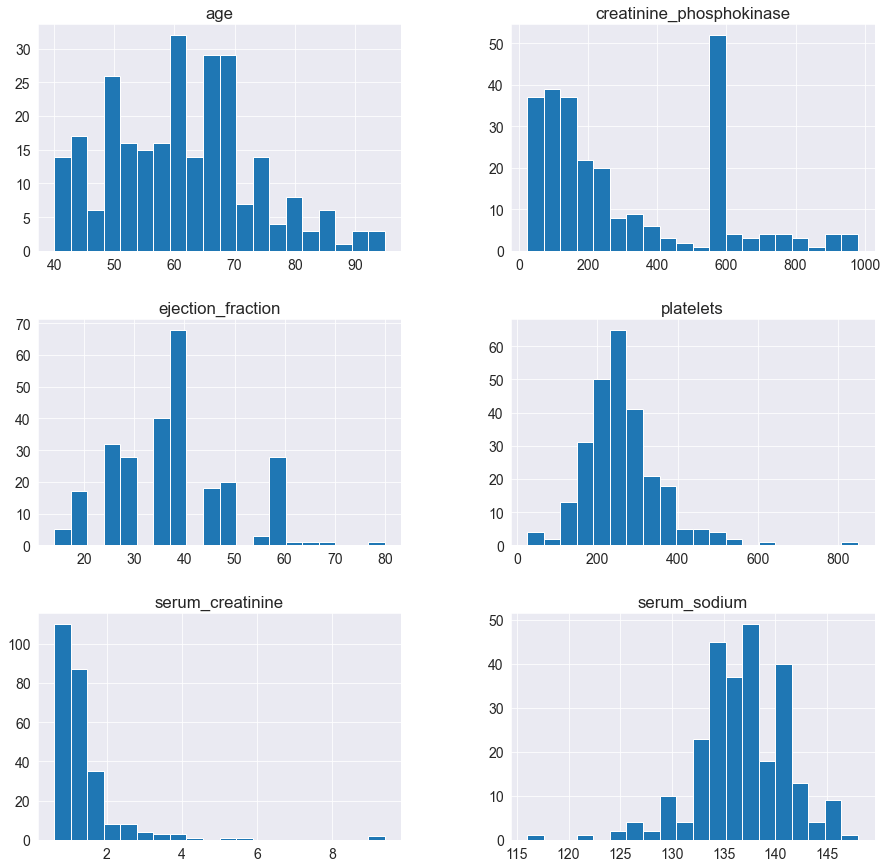

In [171]:
heart_failure[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].hist(bins=20, figsize=(15, 15))

In [172]:
heart_failure[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,61.262357,310.882129,38.167300,263.087452,1.394981,136.551331
std,12.051559,247.586143,12.039794,95.974929,0.995056,4.288747
min,40.000000,23.000000,14.000000,25.000000,0.600000,116.000000
25%,51.500000,109.000000,30.000000,210.000000,0.900000,134.000000
50%,60.000000,211.000000,38.000000,262.000000,1.100000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.450000,140.000000
max,95.000000,981.000000,80.000000,850.000000,9.400000,148.000000


**Kesimpulan**

Penderita gagal jantung paling banyak berusia `60 tahun`, mayoritas memiliki `kadar CPK sebesar 600`, dan `ejection_fraction 40%`, jumlah `platelet antara 200-400`, kadar `serum keratin kurang dari 2`, dan kadar `serum sodium antara 135-140`.

### Mengetahui kriteria keselamatan penderita gagal jantung

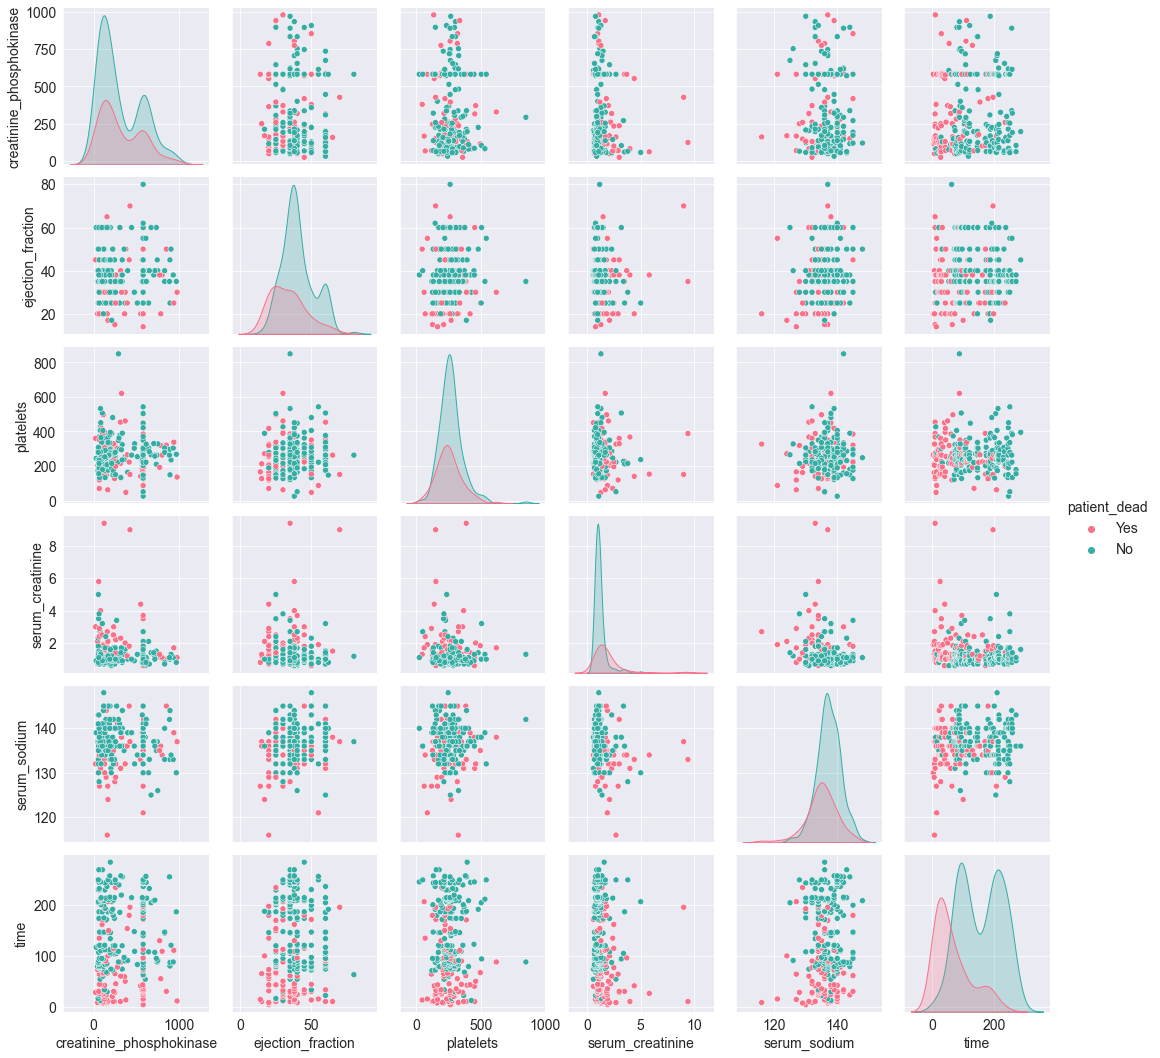

In [173]:
sns.pairplot(heart_failure[["creatinine_phosphokinase", "ejection_fraction",
                            "platelets", "serum_creatinine",
                            "serum_sodium", "time", "patient_dead"]], hue = "patient_dead", 
            diag_kind='kde', kind='scatter', palette='husl')

In [174]:
y = heart_failure.groupby("patient_dead")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

creatinine_phosphokinase        ejection_fraction         \
                                 mean median              mean median   
patient_dead                                                            
No                         305.649718  200.0         40.367232   38.0   
Yes                        321.651163  234.0         33.639535   30.0   

               platelets        serum_creatinine        serum_sodium         \
                    mean median             mean median         mean median   
patient_dead                                                                  
No            267.593220  263.0         1.177797    1.0   137.271186  137.0   
Yes           253.813953  248.5         1.841977    1.4   135.069767  135.0   

                    time         
                    mean median  
patient_dead                     
No            156.570621  148.0  
Yes            66.325581   43.0

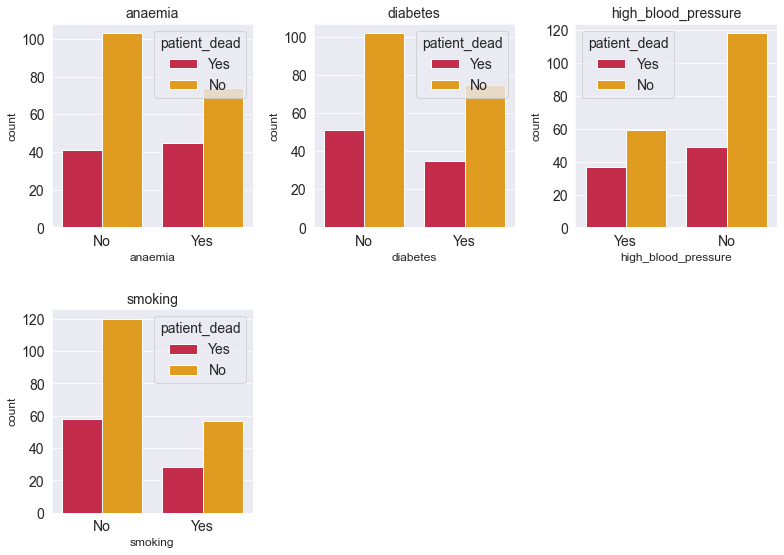

In [175]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure','smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= heart_failure, x = var, hue="patient_dead", palette = ['crimson','orange'])

**Kesimpulan**

Diagram diatas menunjukkan bahwa penderita gagal jantung yang memiliki penyakit bawaan berupa anemia, diabetes, tekanan darah tinggi dan pecandu rokok memiliki peluang tidak selamat lebih besar.

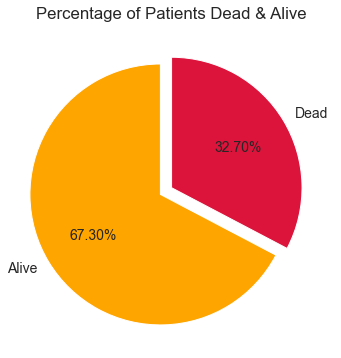

In [176]:
dead_count = heart_failure.patient_dead.value_counts()

plt.figure(figsize = (12, 6))
plt.pie(dead_count, labels = ["Alive", "Dead"], autopct = '%.2f%%', startangle = 90, colors = ['orange', 'crimson'], explode=[0.1, 0],)
plt.title("Percentage of Patients Dead & Alive");

**Kesimpulan**

Diagram pie tersebut menginformasikan bahwa 67,30% penderita gagal jantung dapat selamat. Tindak lanjut pasien gagal jantung berbeda-beda. Merokok merupakan salah satu faktor yang membedakan durasi pengobatan pasien gagal jantung

### Mengetahui durasi tindak lanjut pasien gagal jantung yang merokok dan tidak merokok

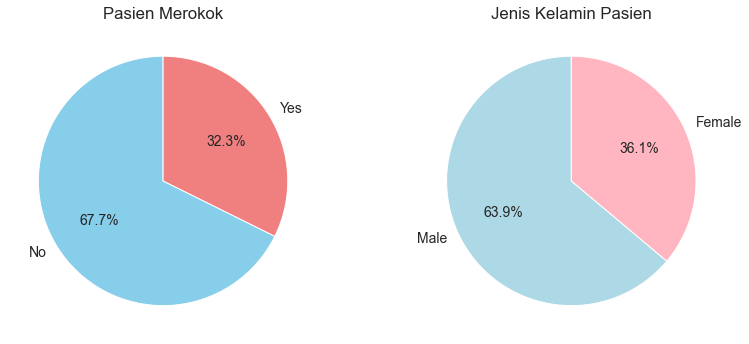

In [177]:
# Data
smoking_counts = heart_failure.smoking.value_counts()
sex_counts = heart_failure.sex.value_counts()

# Plotting diagram pie untuk Pasien Merokok
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Pasien Merokok')

# Plotting diagram pie untuk Jenis Kelamin Pasien
plt.subplot(1, 2, 2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Jenis Kelamin Pasien')

plt.tight_layout()
plt.show()


**Kesimpulan**

Dataset menunjukkan bahwa mayoritas penderita gagal jantung merupakan perokok dan mayoritas penderita adalah laki-laki

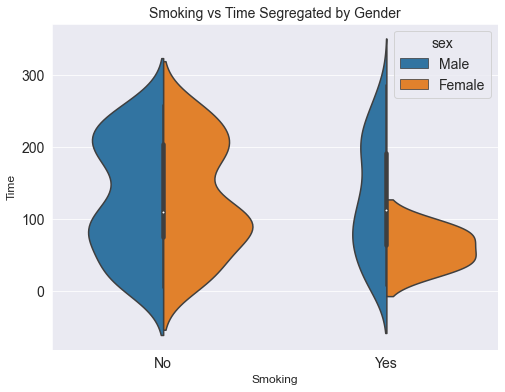

In [178]:
plt.figure(figsize=(8, 6))
a=sns.violinplot(x=heart_failure.smoking, y=heart_failure.time, hue=df.sex, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

**Kesimpulan**

Diperoleh informasi bahwa durasi tindak lanjut pasien bukan perokok laki-laki dan perempuan sama. Namun, pasien laki-laki perokok memilki durasi tindak lanjut lebih lama dibandingkan pasien perokok perempuan.

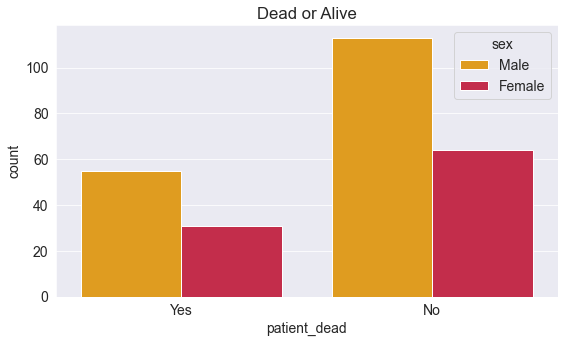

In [179]:
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');
sns.countplot(x = heart_failure.patient_dead, hue = heart_failure.sex, palette = ['orange', 'crimson']); 

## **Data Preprocessing** 
<hr>
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [180]:
# Menampilkan data teratas dan tail
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_dead
0,75,No,582,No,20,Yes,265,1.9,130,Male,No,4,Yes
2,65,No,146,No,20,No,162,1.3,129,Male,Yes,7,Yes
3,50,Yes,111,No,20,No,210,1.9,137,Male,No,7,Yes
4,65,Yes,160,Yes,20,No,327,2.7,116,Female,No,8,Yes
5,90,Yes,47,No,40,Yes,204,2.1,132,Male,Yes,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60,No,320,No,35,No,133,1.4,139,Male,No,258,No
292,52,No,190,Yes,38,No,382,1.0,140,Male,Yes,258,No
293,63,Yes,103,Yes,35,No,179,0.9,136,Male,Yes,270,No
294,62,No,61,Yes,38,Yes,155,1.1,143,Male,Yes,270,No


### Label Encoding

Karena sebelumnya data diubah ke dalam bentuk non numerik, maka akan dilakukan label encoding untuk mengubah data menjadi data numerik secara keseluruhan

In [181]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart_failure.anaemia = le.fit_transform(heart_failure.anaemia)
heart_failure.diabetes = le.fit_transform(heart_failure.diabetes)
heart_failure.high_blood_pressure = le.fit_transform(heart_failure.high_blood_pressure)
heart_failure.sex = le.fit_transform(heart_failure.sex)
heart_failure.smoking = le.fit_transform(heart_failure.smoking)
heart_failure.patient_dead = le.fit_transform(heart_failure.patient_dead)

In [182]:
# Menampilkan data teratas dan tail
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_dead
0,75,0,582,0,20,1,265,1.9,130,1,0,4,1
2,65,0,146,0,20,0,162,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60,0,320,0,35,0,133,1.4,139,1,0,258,0
292,52,0,190,1,38,0,382,1.0,140,1,1,258,0
293,63,1,103,1,35,0,179,0.9,136,1,1,270,0
294,62,0,61,1,38,1,155,1.1,143,1,1,270,0


In [183]:
# Menampilkan informasi dari dataset
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       263 non-null    int32  
 1   anaemia                   263 non-null    int32  
 2   creatinine_phosphokinase  263 non-null    int64  
 3   diabetes                  263 non-null    int32  
 4   ejection_fraction         263 non-null    int64  
 5   high_blood_pressure       263 non-null    int32  
 6   platelets                 263 non-null    int32  
 7   serum_creatinine          263 non-null    float64
 8   serum_sodium              263 non-null    int64  
 9   sex                       263 non-null    int32  
 10  smoking                   263 non-null    int32  
 11  time                      263 non-null    int64  
 12  patient_dead              263 non-null    int32  
dtypes: float64(1), int32(8), int64(4)
memory usage: 20.5 KB


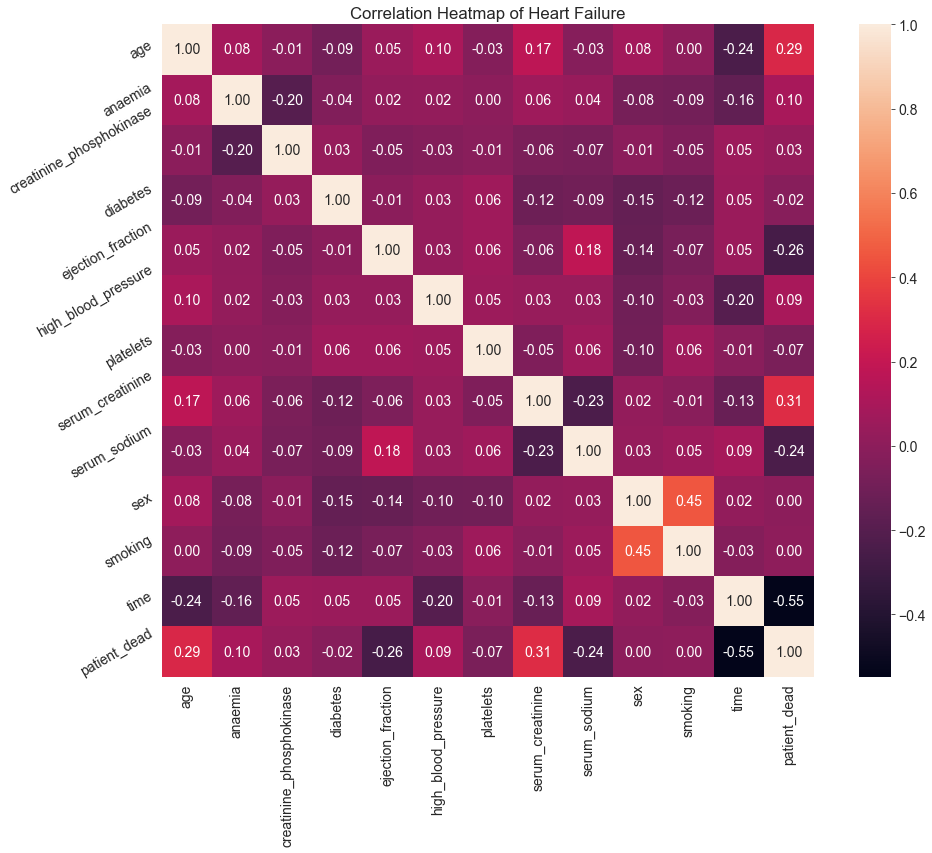

In [184]:
# Menampilkan data korelasi menggunakan heatmap
correlation = heart_failure.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Failure')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Kesimpulan**

Dari diagram heatmap di atas, terlihat bahwa kolom age, serum_creatinine, time, high blood pressure, dan serum_sodium memiliki korelasi yang tinggi dengan kolom patient_dead.

### Splitting dataset

In [185]:
x = heart_failure.drop("patient_dead", axis=1)
y = heart_failure.patient_dead

In [186]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265,1.9,130,1,0,4
2,65,0,146,0,20,0,162,1.3,129,1,1,7
3,50,1,111,0,20,0,210,1.9,137,1,0,7
4,65,1,160,1,20,0,327,2.7,116,0,0,8
5,90,1,47,0,40,1,204,2.1,132,1,1,8


In [187]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: patient_dead, dtype: int32

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## **Pendefinisian Model** 
<hr>
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.



In [189]:
# Random Forest
rf = RandomForestClassifier()

In [190]:
# Boosting Method
gbm = GradientBoostingClassifier(learning_rate=0.01, random_state=1)
lr_boosting = AdaBoostClassifier(LogisticRegression(C=10000, solver='lbfgs'), n_estimators=100, learning_rate = 0.1)
svm_boosting = AdaBoostClassifier(SVC(C=100000, gamma='scale', probability=True), n_estimators=100, learning_rate = 0.1)

Terdapat dua metode pengujian yang akan digunakan pada project kali, antara lain :
1. Metode <b>Logistic Regression</b>. Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.</p>

2. Metode <b>Support Vector Machine (SVM)</b>. SVM adalah algoritma klasifikasi yang digunakan untuk menemukan hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu. SVM bekerja dengan mencari hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur. Hyperplane ini dipilih sedemikian rupa sehingga memiliki margin terbesar, yaitu jarak terpendek antara batas keputusan dan titik-titik terdekat dari masing-masing kelas. Dengan demikian, SVM dapat menghasilkan model klasifikasi yang optimal untuk data yang kompleks.



## **Pelatihan Model** 
<hr>
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [191]:
# Random Forest
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [192]:
# Gradient Boosting
gbm.fit(x_train, y_train)
y_pred_gbm = gbm.predict(x_test)

In [193]:
# Logistic Regression
lr_boosting.fit(x_train, y_train)
y_pred_lr = lr_boosting.predict(x_test)

In [194]:
# SVM
svm_boosting.fit(x_train, y_train)
y_pred_svm = svm_boosting.predict(x_test)

## **Evaluasi Model** 
<hr>
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.

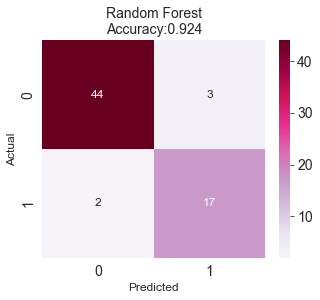

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.85      0.89      0.87        19

    accuracy                           0.92        66
   macro avg       0.90      0.92      0.91        66
weighted avg       0.93      0.92      0.92        66

Accuracy Score: 0.9242424242424242
Precision Score: 0.85
Recall Score: 0.8947368421052632
F1 Score: 0.8717948717948718


In [195]:
# Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score: {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score: {recall_score(y_test,y_pred_rf)}')
print("F1 Score:",f1_score(y_test,y_pred_rf))

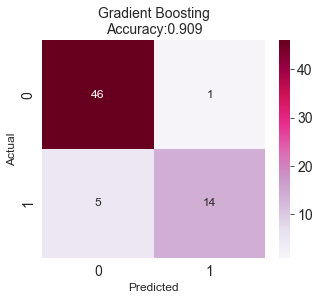

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.93      0.74      0.82        19

    accuracy                           0.91        66
   macro avg       0.92      0.86      0.88        66
weighted avg       0.91      0.91      0.91        66

Accuracy Score: 0.9090909090909091
Precision Score: 0.9333333333333333
Recall Score: 0.7368421052631579
F1 Score: 0.8235294117647058


In [196]:
# Gradient Boosting 
cm = confusion_matrix(y_test, y_pred_gbm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Gradient Boosting\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_gbm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_gbm))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_gbm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_gbm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_gbm)}')
print("F1 Score:",f1_score(y_test,y_pred_gbm))

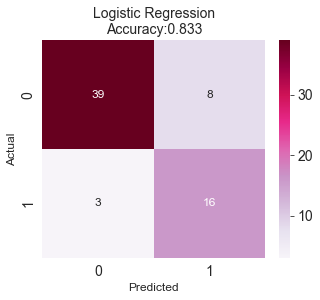

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88        47
           1       0.67      0.84      0.74        19

    accuracy                           0.83        66
   macro avg       0.80      0.84      0.81        66
weighted avg       0.85      0.83      0.84        66

Accuracy Score: 0.8333333333333334
Precision Score: 0.6666666666666666
Recall Score: 0.8421052631578947
F1 Score: 0.744186046511628


In [197]:
# Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

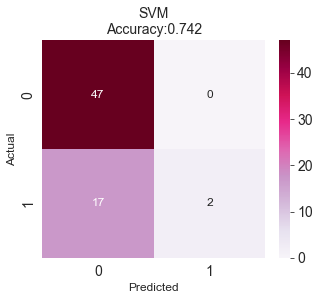

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        47
           1       1.00      0.11      0.19        19

    accuracy                           0.74        66
   macro avg       0.87      0.55      0.52        66
weighted avg       0.81      0.74      0.66        66

Accuracy Score: 0.7424242424242424
Precision Score: 1.0
Recall Score: 0.10526315789473684
F1 Score: 0.1904761904761905


In [198]:
# SVM
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

**Kesimpulan**

Karena nilai akurasi pada model dengan menggunakan `Random Forest adalah yang tertinggi yakni 92,42%` jika dibandingkan dengan menggunakan Gradient Boosting (90,90%), Logistic Regression (74,2%), dan SVM (74,24%), maka dipilih model dengan menggunakan `Random Forest Classifier`.

## **Model Inference** 
<hr>
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [204]:
scaler_ = StandardScaler()
scaler_.fit(x_train, y_train)

StandardScaler()

Model inference digunakan untuk menguji keakuratan model dengan data berupa data selain yang tersedia pada dataset.

Misalkan pasien memiliki data sebagai berikut :
1. Usia : `65` 
2. Anemia: `0`
3. Kadar CPK : `146`
4. Diabetes : `0`
5. Fraksi Ejeksi : `20`
6. Darah tinggi : `0`
7. Jumlah Platelets : `162`
8. Kadar serum kreatinin : `1.3`
9. Kadar serum sodium : `129`
10. Laki-laki=1 atau Perempuan=0 : `1`
11. Apakah perokok : `1`
12. Lama tindak lanjut : `7`

Silahkan masukkan inputan di atas untuk memprediksi apakah pasien akan selamat atau tidak.

In [206]:
age = float(input("Usia : "))
anaemia = float(input("Apakah menderita anemia: "))
creatinine_phosphokinase = float(input("Kadar CPK: "))
diabetes = float(input("Apakah menderita diabetes: "))
ejection_fraction = float(input("Fraksi Ejeksi: "))
high_blood_pressure = float(input('Apakah menderita tekanan darah tinggi: '))
platelets = float(input('Jumlah platelets: '))
serum_creatinine = float(input('Kadar serum kreatinin: '))
serum_sodium = float(input('Kadar serum sodium: '))
sex = float(input('Laki-laki=1 atau Perempuan=0 '))
smoking = float(input('Apakah perokok: '))
Time = float(input('Lama tindak lanjut: '))

val = [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, Time]
val = scaler_.transform([val])
val = val.reshape(12,)

print(val)

val_predict = rf.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka diprediksi pasien tidak selamat')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka diprediksi pasien selamat')
else:
    print('Prediksi tidak valid')

[ 0.25880942 -0.86218492 -0.55127706 -0.81822462 -1.49005953 -0.75894664
 -1.02161588 -0.12056694 -1.79356902  0.70980053  1.30331506 -1.54437176]
Prediksi bernilai 1, maka diprediksi pasien tidak selamat


## **Pengambilan Kesimpulan** 
<hr>
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil analisis, dapat disimpulkan bahwa :
1. Penderita gagal jantung paling banyak berusia 60 tahun, mayoritas memiliki kadar CPK sebesar 600, dan ejection_fraction 40%, jumlah platelet antara 200-400, kadar serum keratin kurang dari 2 dan kadar serum sodium antara 135-140.
2. Penderita gagal jantung yang memiliki penyakit bawaan berupa anemia, diabetes, tekanan darah tinggi dan pecandu rokok memiliki peluang tidak selamat lebih besar.
3. Sekitar 67,30% penderita gagal jantung dapat selamat. Tindak lanjut pasien gagal jantung dapat berbeda-beda.
4. Mayoritas penderita gagal jantung merupakan perokok dan mayoritas penderita berjenis kelamin laki-laki.
5. Durasi tindak lanjut pasien bukan perokok laki-laki dan perempuan sama. Namun, pasien laki-laki perokok memilki durasi tindak lanjut lebih lama dibandingkan pasien perokok perempuan.
6. Kolom age, serum_creatinine, time, high blood pressure, dan serum_sodium memiliki korelasi yang tinggi dengan kolom patient_dead.
7. Digunakan beberapa algoritma untuk membangun model, yakni Random Forest Classifier, Gradient Boosting, Logistic Regression dengan boosting, dan SVM dengan boosting. Dari hasil perhitungan akurasi, didapatkan bahwa model dengan menggunakan Random Forest Classifier memiliki tingkat akurasi tertinggi jika dibandingkan model lainnya yaitu sebesar 92.42%.

## **Export Model** 
<hr>

In [210]:
# save the model to disk
filename = open("PYTN_KampusMerdeka_fp3_NadiatusSalam.pkl", "wb")

pickle.dump(rf, filename)
filename.close()